<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/osmx_tutorial_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# def factorial(n):
#   if n <= 1:
#     return 1
#   return n*factorial(n-1)
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas tqdm osmnx --quiet

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 95 kB 2.7 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 
     |████████████████████████████████| 16.7 MB 555 kB/s 
     |████████████████████████████████| 11.2 MB 28.3 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 1.0 MB 49.3 MB/s 
     |████████████████████████████████| 965 kB 49.2 MB/s 


In [ ]:
# !pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

In [ ]:
# Load road network and display it
G = ox.graph_from_place('Sutherland Shire Council', network_type='drive') # loads road acessible to cars


In [ ]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [ ]:
print(list(G))
print(len(list(G)))

[8090379, 8090383, 8090392, 8090418, 8090438, 8620661, 8620778, 8621698, 8660046, 8660118, 8660121, 8660180, 8660472, 9593499, 12233044, 12233086, 12233165, 17855454, 17855456, 17855458, 17855459, 17856167, 17856168, 17856172, 17856173, 17856174, 17856175, 17856452, 17856676, 17856677, 17856689, 17916537, 17916540, 17916542, 17916547, 17916550, 17916557, 17918043, 17919190, 17919195, 17919198, 17919204, 17919853, 17919860, 17919867, 17919875, 17919883, 17919885, 17920096, 17920774, 17920851, 17922098, 17922100, 17922104, 17922106, 17922109, 17922113, 17922124, 17922166, 17922173, 17922177, 17922182, 17922185, 17922215, 17922227, 17922233, 17922247, 17922251, 17922256, 17922730, 17922739, 17922758, 17922760, 17922762, 17922780, 17923250, 17923253, 17923278, 18255221, 18255224, 18255242, 18255244, 18255247, 18255248, 18255714, 18255717, 18255721, 18256146, 18257121, 18257323, 18257400, 18257403, 18260715, 18260716, 18260727, 18260730, 18260733, 18261347, 18261348, 18261420, 18261442, 182

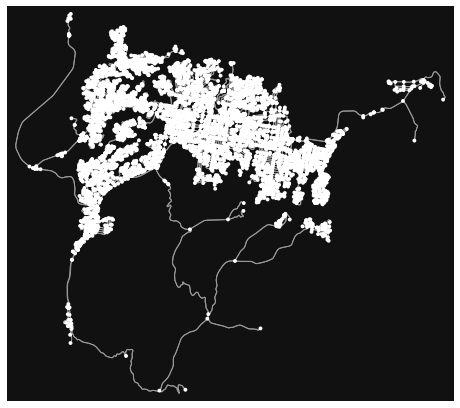

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
ox.plot_graph(G)

In [ ]:
print(f"Node count: {len(G.nodes())} -- Edge count: {len(G.edges())}" )

Node count: 5613 -- Edge count: 12488


## Get information about neighbouring nodes, edges and its attributes

In [ ]:
# Find nearest node
station_st_node_id = ox.distance.nearest_nodes(G, [151.014898], [-34.06714])[0]
print(station_st_node_id)

268185063


In [ ]:
#Find node by ID and show its properties
G.nodes.get(station_st_node_id)

{'y': -34.0671669, 'x': 151.0149055, 'street_count': 3}

In [ ]:
#Find its neighbouring nodes
list(G.neighbors(station_st_node_id))

[1839271812, 668727077]

In [ ]:
import json

# out_edges, what does it show?
G.out_edges(station_st_node_id, data=True)

OutMultiEdgeDataView([(268185063, 1839271812, {'osmid': 173099486, 'name': 'Station Street', 'highway': 'unclassified', 'maxspeed': '50', 'oneway': False, 'length': 101.789, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fbbee1c56d0>}), (268185063, 668727077, {'osmid': 356065478, 'oneway': True, 'lanes': '3', 'ref': 'A1', 'name': 'Railway Parade', 'highway': 'trunk', 'maxspeed': '70', 'length': 95.757, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fbbee1c51d0>})])

In [ ]:
# show edge attributes
for edge in G.out_edges(station_st_node_id, data=True):
    print(edge)
    print("\n=== Edge ====")
    print("Source and target node ID:", edge[:2])
    edge_attributes = edge[2]
    # remove geometry object from output as it is a different object and can't be printed like this
    edge_attributes_wo_geometry = {i:edge_attributes[i] for i in edge_attributes if i!='geometry'}
    print("Edge attributes:", json.dumps(edge_attributes_wo_geometry, indent=4))

(268185063, 1839271812, {'osmid': 173099486, 'name': 'Station Street', 'highway': 'unclassified', 'maxspeed': '50', 'oneway': False, 'length': 101.789, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fbbee1c56d0>})

=== Edge ====
Source and target node ID: (268185063, 1839271812)
Edge attributes: {
    "osmid": 173099486,
    "name": "Station Street",
    "highway": "unclassified",
    "maxspeed": "50",
    "oneway": false,
    "length": 101.789
}
(268185063, 668727077, {'osmid': 356065478, 'oneway': True, 'lanes': '3', 'ref': 'A1', 'name': 'Railway Parade', 'highway': 'trunk', 'maxspeed': '70', 'length': 95.757, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fbbee1c51d0>})

=== Edge ====
Source and target node ID: (268185063, 668727077)
Edge attributes: {
    "osmid": 356065478,
    "oneway": true,
    "lanes": "3",
    "ref": "A1",
    "name": "Railway Parade",
    "highway": "trunk",
    "maxspeed": "70",
    "length": 95.757
}


## Finding shortest route

First calculate time to drinve along this edge

In [ ]:
# impute edge (driving) speeds and calculate edge traversal times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
# show edge attributes
for edge in G.out_edges(station_st_node_id, data=True):
    print(edge)
    print("\n=== Edge ====")
    print("Source and target node ID:", edge[:2])
    edge_attributes = edge[2]
    # remove geometry object from output as it is a different object and can't be printed like this
    edge_attributes_wo_geometry = {i:edge_attributes[i] for i in edge_attributes if i!='geometry'}
    print("Edge attributes:", json.dumps(edge_attributes_wo_geometry, indent=4))

(268185063, 1839271812, {'osmid': 173099486, 'name': 'Station Street', 'highway': 'unclassified', 'maxspeed': '50', 'oneway': False, 'length': 101.789, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fbbee1c56d0>, 'speed_kph': 50.0, 'travel_time': 7.3})

=== Edge ====
Source and target node ID: (268185063, 1839271812)
Edge attributes: {
    "osmid": 173099486,
    "name": "Station Street",
    "highway": "unclassified",
    "maxspeed": "50",
    "oneway": false,
    "length": 101.789,
    "speed_kph": 50.0,
    "travel_time": 7.3
}
(268185063, 668727077, {'osmid': 356065478, 'oneway': True, 'lanes': '3', 'ref': 'A1', 'name': 'Railway Parade', 'highway': 'trunk', 'maxspeed': '70', 'length': 95.757, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fbbee1c51d0>, 'speed_kph': 70.0, 'travel_time': 4.9})

=== Edge ====
Source and target node ID: (268185063, 668727077)
Edge attributes: {
    "osmid": 356065478,
    "oneway": true,
    "lanes": "3",
    "ref": 

In [ ]:
# convert string address into geographical coordinates
def geocode_address(address, crs=4326):
    geocode = gpd.tools.geocode(address, provider='nominatim', 
                user_agent="drive time demo").to_crs(crs)
    return (geocode.iloc[0].geometry.y, geocode.iloc[0].geometry.x)

In [ ]:
# get origin and destination coordinates
origin_point = geocode_address("Whimbrel Place, Woronora Heights, NSW")
destination_point = geocode_address("Prince Edward Park, Woronora, NSW")

In [ ]:
# get closes graph nodes to origin and destination
orig_node = ox.distance.nearest_nodes(
    G, 
    origin_point[1], 
    origin_point[0]
    )

destination_node = ox.distance.nearest_nodes(
    G,
    destination_point[1], 
    destination_point[0]
    )

In [ ]:
print(orig_node)
type(orig_node)

1859560110


int

In [ ]:
import networkx as nx

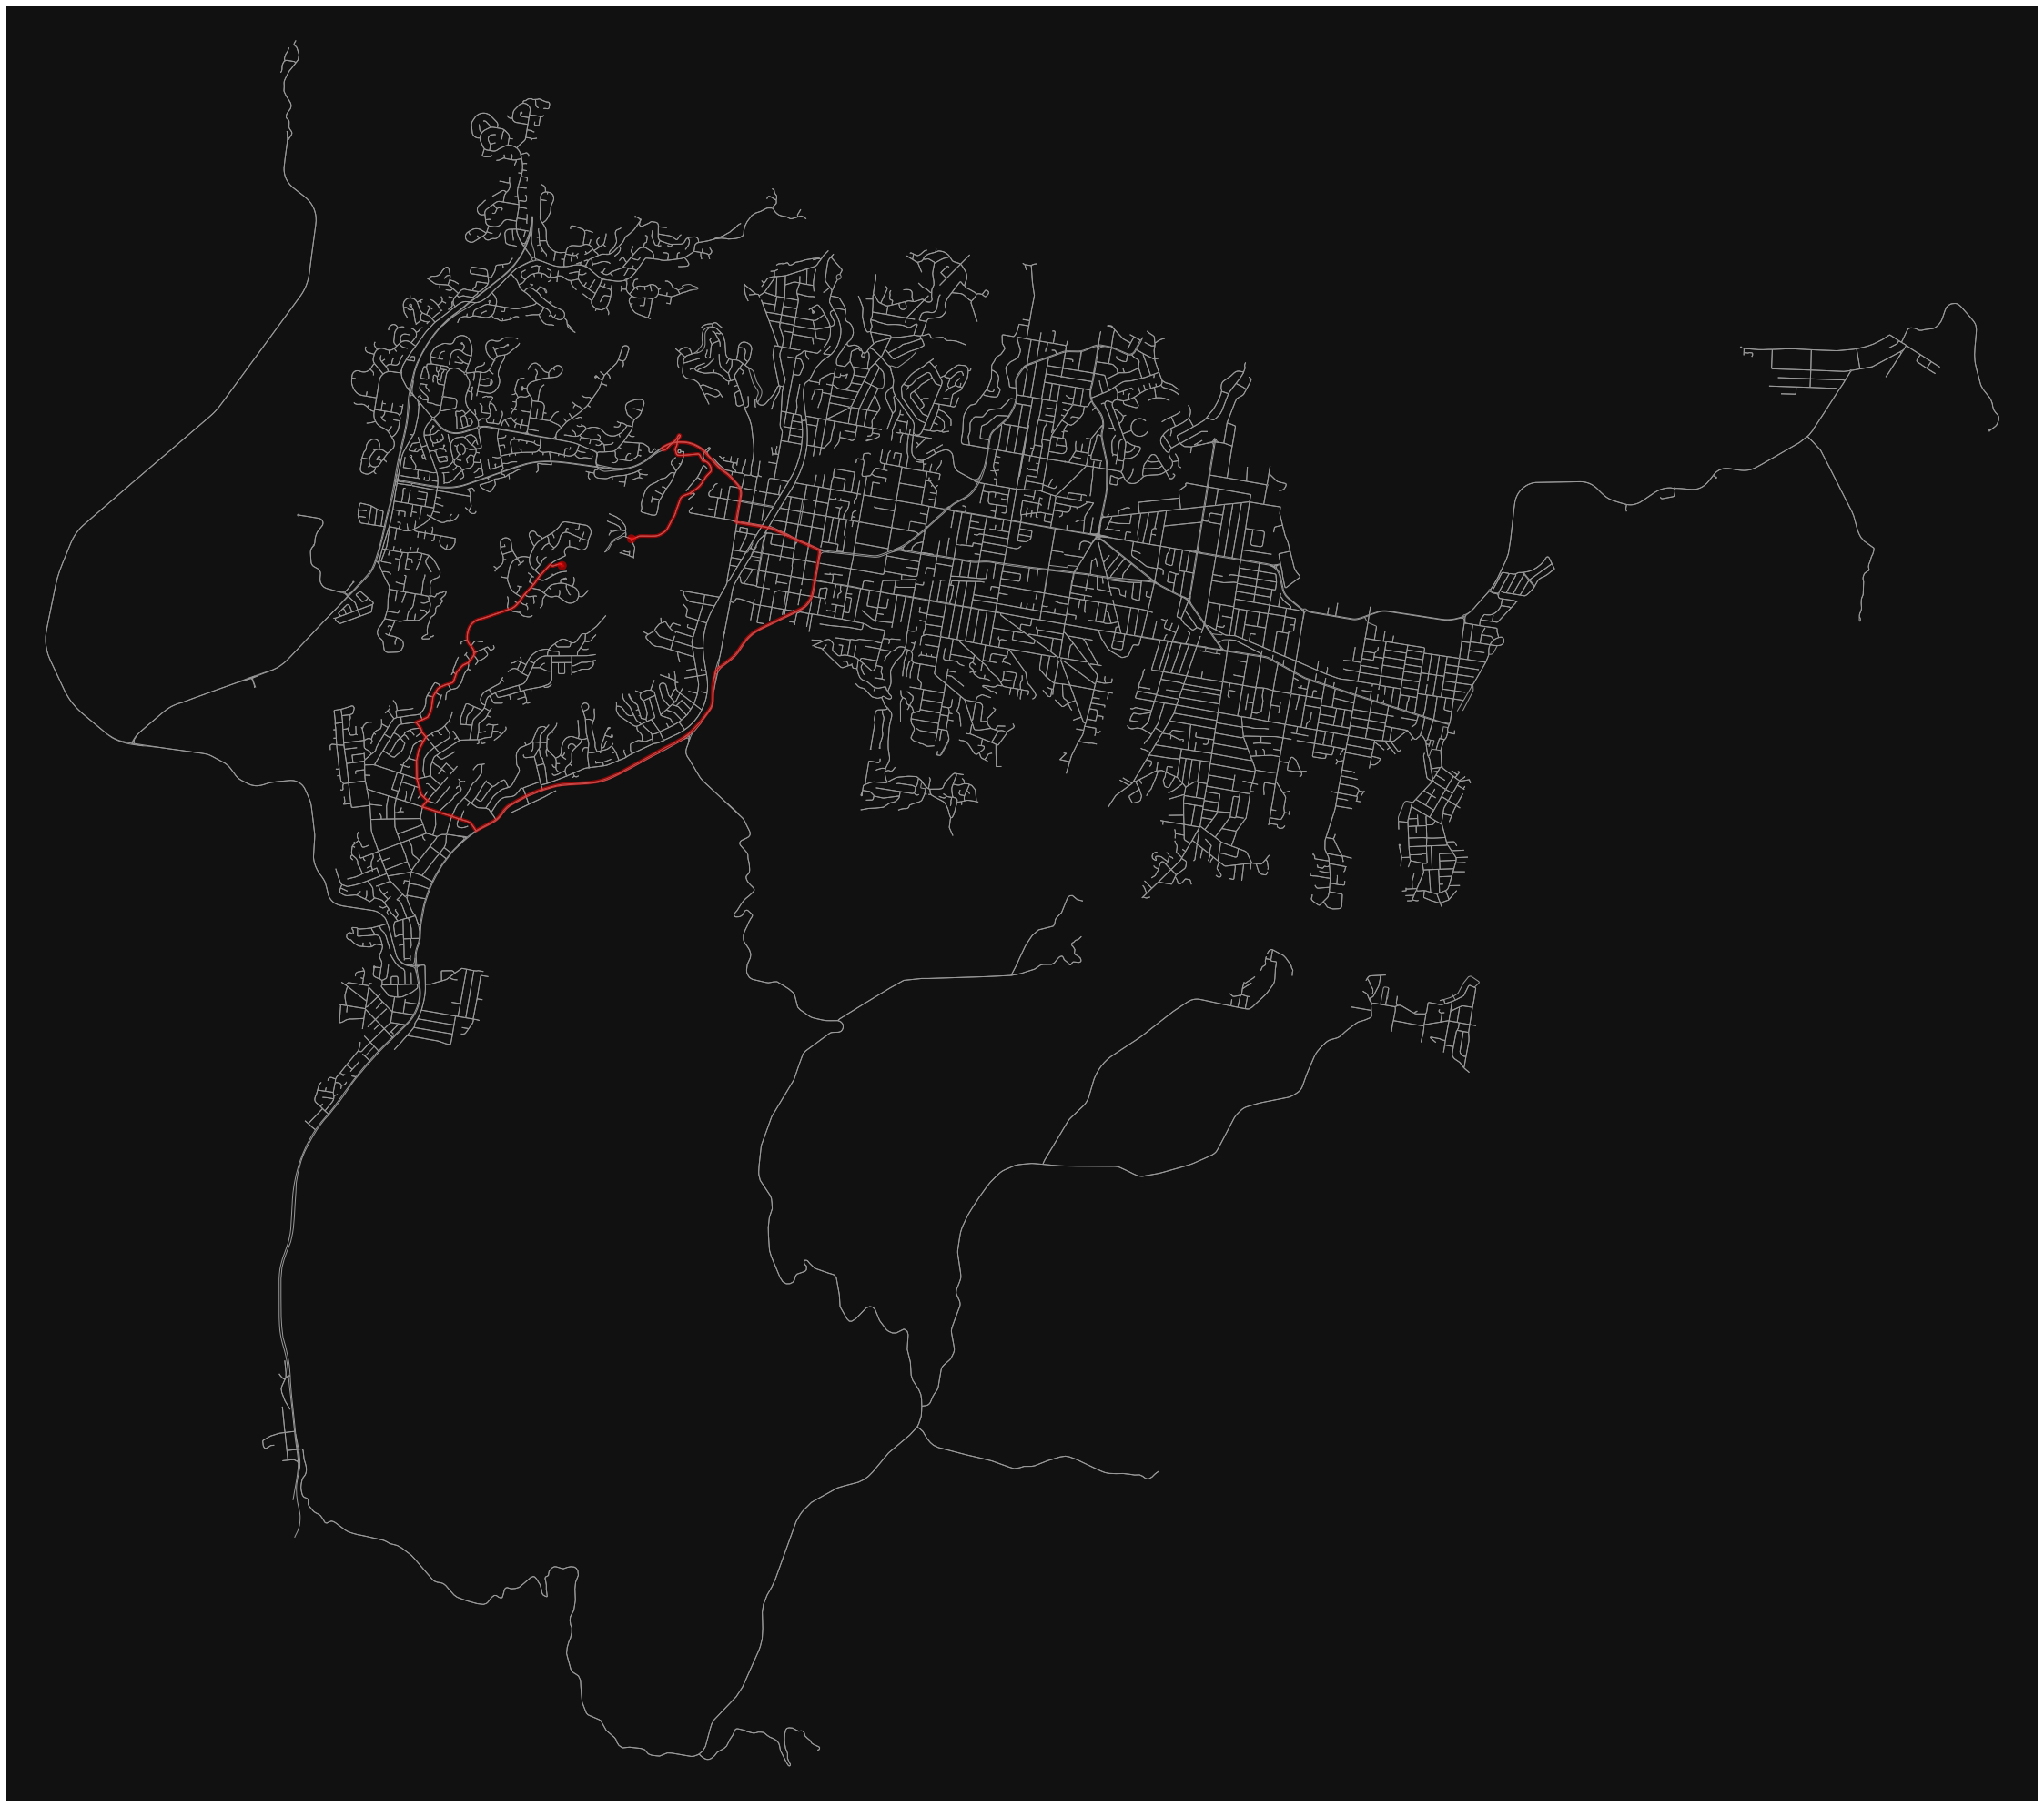

In [ ]:
# find shortest path based on travel time
route = nx.shortest_path(G, orig_node, destination_node, weight='travel_time')

fig, ax = ox.plot_graph_route(G, route, node_size=0, figsize=(40,40))

In [ ]:
# calculate route lengths
edge_lengths = ox.utils_graph.get_route_edge_attributes(
    G, route, 'length') 
total_route_length = sum(edge_lengths)
print("Total route length in km:", total_route_length/1000)

Total route length in km: 16.776618999999997


In [ ]:
print(edge_lengths)

[173.46, 186.651, 50.541, 101.83699999999999, 42.007, 124.577, 52.785, 58.483999999999995, 38.185, 112.575, 29.39, 725.8989999999999, 92.565, 85.378, 17.705, 20.412, 26.258, 80.229, 33.385, 225.095, 177.93900000000002, 106.566, 94.38900000000001, 62.876, 350.332, 86.188, 97.594, 55.806, 76.378, 66.845, 261.627, 227.571, 11.71, 11.363999999999999, 106.981, 91.92099999999999, 47.04, 57.678, 10.620000000000001, 10.421000000000001, 10.905, 68.477, 21.2, 1.98, 32.169, 188.861, 160.932, 12.185999999999998, 11.929, 84.303, 32.98, 250.79000000000002, 291.131, 498.91399999999993, 227.65200000000002, 1953.3149999999998, 92.86900000000001, 36.207, 769.4200000000002, 44.344, 92.64, 46.232, 1509.5600000000002, 202.524, 9.16, 346.16700000000003, 53.971999999999994, 107.89500000000001, 9.964, 28.61, 144.738, 24.310000000000002, 100.106, 686.5830000000001, 10.611, 12.91, 257.963, 9.422, 155.36299999999997, 1232.5079999999998, 72.42, 632.1429999999999, 304.26700000000005, 13.525, 15.578, 319.538, 234.7

In [ ]:
# Travel time
edge_travel_time = ox.utils_graph.get_route_edge_attributes(
    G, route, 'travel_time') 
route_travel_time = sum(edge_travel_time)
print("Travel time in minutes:", route_travel_time/60)

Travel time in minutes: 16.866666666666667
